In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from cfgs.config import cfg
from trainer.trainer import Trainer
from nets.additive_net import Net
from data.uniform_01_generator import Generator

In [2]:
%matplotlib inline
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst = np.expand_dims(X_tst, 1)
print(X_tst.shape)

cfg.test.num_misreports = 1
cfg.test.gd_iter = 0
cfg.test.batch_size = D
cfg.test.num_batches = X_tst.shape[0]/cfg.test.batch_size

(40401, 1, 2)


In [3]:
net = Net(cfg)
generator = Generator(cfg, 'test', X_tst)
clip_op_lambda = (lambda x: tf.assign(x, tf.clip_by_value(x, 0.0, 1.0)))
m = Trainer(cfg, "test", net, clip_op_lambda)
m.test(generator)

INFO:tensorflow:Restoring parameters from 1x2/1x2_up_add_10.0/model-400000


2019-01-18 16:02:53,969:INFO:Restoring parameters from 1x2/1x2_up_add_10.0/model-400000
2019-01-18 16:02:54,181:INFO:TEST BATCH-0: t = 0.1822, Revenue: 0.211471, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:54,188:INFO:TEST BATCH-1: t = 0.1881, Revenue: 0.211074, Regret: 0.000002, IRP: 0.000000
2019-01-18 16:02:54,195:INFO:TEST BATCH-2: t = 0.1934, Revenue: 0.210897, Regret: 0.000001, IRP: 0.000000
2019-01-18 16:02:54,202:INFO:TEST BATCH-3: t = 0.1991, Revenue: 0.210944, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:54,208:INFO:TEST BATCH-4: t = 0.2046, Revenue: 0.211211, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:54,215:INFO:TEST BATCH-5: t = 0.2105, Revenue: 0.211690, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:54,222:INFO:TEST BATCH-6: t = 0.2157, Revenue: 0.212365, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:54,228:INFO:TEST BATCH-7: t = 0.2211, Revenue: 0.213223, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:54,235:INFO:TEST BATCH-8: t = 0.2270, Revenue: 

2019-01-18 16:02:54,696:INFO:TEST BATCH-76: t = 0.6117, Revenue: 0.455705, Regret: 0.000002, IRP: 0.000000
2019-01-18 16:02:54,702:INFO:TEST BATCH-77: t = 0.6173, Revenue: 0.460211, Regret: 0.000006, IRP: 0.000000
2019-01-18 16:02:54,708:INFO:TEST BATCH-78: t = 0.6225, Revenue: 0.464711, Regret: 0.000001, IRP: 0.000000
2019-01-18 16:02:54,715:INFO:TEST BATCH-79: t = 0.6281, Revenue: 0.469206, Regret: 0.000001, IRP: 0.000000
2019-01-18 16:02:54,722:INFO:TEST BATCH-80: t = 0.6333, Revenue: 0.473696, Regret: 0.000001, IRP: 0.000000
2019-01-18 16:02:54,728:INFO:TEST BATCH-81: t = 0.6386, Revenue: 0.478181, Regret: 0.000001, IRP: 0.000000
2019-01-18 16:02:54,735:INFO:TEST BATCH-82: t = 0.6442, Revenue: 0.482661, Regret: 0.000002, IRP: 0.000000
2019-01-18 16:02:54,741:INFO:TEST BATCH-83: t = 0.6494, Revenue: 0.487137, Regret: 0.000007, IRP: 0.000000
2019-01-18 16:02:54,748:INFO:TEST BATCH-84: t = 0.6548, Revenue: 0.491609, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:54,755:INFO:TEST BAT

2019-01-18 16:02:55,209:INFO:TEST BATCH-153: t = 1.0300, Revenue: 0.795716, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:55,216:INFO:TEST BATCH-154: t = 1.0354, Revenue: 0.796661, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:55,223:INFO:TEST BATCH-155: t = 1.0401, Revenue: 0.797518, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:55,229:INFO:TEST BATCH-156: t = 1.0459, Revenue: 0.798297, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:55,237:INFO:TEST BATCH-157: t = 1.0522, Revenue: 0.799007, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:55,244:INFO:TEST BATCH-158: t = 1.0580, Revenue: 0.799656, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:55,250:INFO:TEST BATCH-159: t = 1.0633, Revenue: 0.800251, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:55,256:INFO:TEST BATCH-160: t = 1.0677, Revenue: 0.800798, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:55,264:INFO:TEST BATCH-161: t = 1.0737, Revenue: 0.801301, Regret: 0.000000, IRP: 0.000000
2019-01-18 16:02:55,270:INFO

DEBUG: xsum = 40401.000000


In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,1)

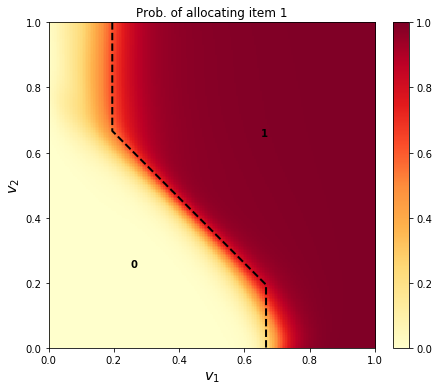

In [6]:
x1 = (2.0 - np.sqrt(2.0))/3.0
x2 = 2.0/3.0
points = [(x1, 1.0), (x1, x2), (x2, x1), (x2, 0)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))


fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 0], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
                    
plt.text(0.25, 0.25, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.65, 0.65, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
plt.colorbar(img, fraction=0.046, pad=0.04)

#plt.savefig('A01_alloc1.pdf', bbox_inches = 'tight', pad_inches = 0.05)

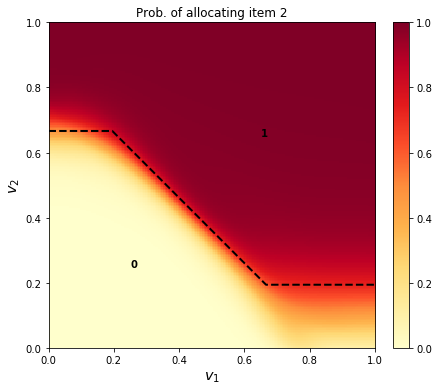

In [7]:
x1 = (2.0 - np.sqrt(2.0))/3.0
x2 = 2.0/3.0
points = [(0.0, x2), (x1, x2), (x2, x1), (1.0, x1)]

x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))

plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 1], extent=[0,1,0,1], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
              
plt.text(0.25, 0.25, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(0.65, 0.65, s='1', color='black', fontsize='10', fontweight='bold')
    
ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
plt.colorbar(img, fraction=0.046, pad=0.04)

#plt.savefig('A01_alloc2.pdf', bbox_inches = 'tight', pad_inches = 0.05)